# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [141]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import csv
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [83]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

clean_lats = []
clean_lngs = []
        
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        clean_lats.append(lat_lng[0])
        clean_lngs.append(lat_lng[1])

# Print the city count to confirm sufficient count
print(len(cities))
print(len(clean_lats))
print(len(clean_lngs))

624
624
624


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [84]:
# MANUAL CHECK WITH LAT AND LONG THROUGH API
#url = "http://api.openweathermap.org/data/2.5/weather?"
#city = "Phoenix"
#query_url = url + "appid=" + weather_api_key + "&q=" + city
#lat = lats[0]
#lon = lngs[0]
#print(f" Lat = {lat}, Lon = {lon}")
# Build query URL
#Query structure from OpenWeatherMap.org -
#    api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={your api key}
#query_url = url + "appid=" + weather_api_key + "&lat=" + str(lat) + "&lon=" + str(lon)
#print(query_url)

In [85]:
# Perform a weather check on each city using a series of successive API calls.
base_url = "http://api.openweathermap.org/data/2.5/weather?"
url = base_url + "appid=" + weather_api_key + "&units=imperial"

# set up lists to hold reponse info
temp_max = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

for city in cities:
    try:
        print(f"Processing Record {cities.index(city)} of Set 1 | {city}")
        query_url = url + "&q=" + city
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        # Get the parameters from the response
        #print(f"The weather API responded with: {weather_json}.")
        print(f"Max Temperature (F): {weather_json['main']['temp_max']}")
        print(f"Humidity (%): {weather_json['main']['humidity']}")
        print(f"Cloudiness (%): {weather_json['clouds']['all']}")
        print(f"Wind Speed (mph): {weather_json['wind']['speed']}")
        print(f"Country: {weather_json['sys']['country']}")
        print(f"Date: {weather_json['dt']}")
        temp_max.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        windspeed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
    except KeyError:
        print("City not found. Skipping...")
        temp_max.append("NaN")
        humidity.append("NaN")
        cloudiness.append("NaN")
        windspeed.append("NaN")
        country.append("NaN")
        date.append("NaN")


Processing Record 0 of Set 1 | olafsvik
Max Temperature (F): 49.64
Humidity (%): 92
Cloudiness (%): 100
Wind Speed (mph): 15.95
Country: IS
Date: 1594844489
Processing Record 1 of Set 1 | ribeira grande
Max Temperature (F): 71.6
Humidity (%): 73
Cloudiness (%): 75
Wind Speed (mph): 11.41
Country: PT
Date: 1594844490
Processing Record 2 of Set 1 | rivers
Max Temperature (F): 75.2
Humidity (%): 47
Cloudiness (%): 75
Wind Speed (mph): 23.04
Country: CA
Date: 1594844490
Processing Record 3 of Set 1 | vaini
Max Temperature (F): 71.6
Humidity (%): 88
Cloudiness (%): 40
Wind Speed (mph): 6.93
Country: TO
Date: 1594844490
Processing Record 4 of Set 1 | great yarmouth
Max Temperature (F): 60.01
Humidity (%): 99
Cloudiness (%): 100
Wind Speed (mph): 8.16
Country: GB
Date: 1594844490
Processing Record 5 of Set 1 | mount gambier
Max Temperature (F): 37.4
Humidity (%): 100
Cloudiness (%): 75
Wind Speed (mph): 8.05
Country: AU
Date: 1594844490
Processing Record 6 of Set 1 | muli
Max Temperature (F):

Max Temperature (F): 66.22
Humidity (%): 95
Cloudiness (%): 91
Wind Speed (mph): 3.18
Country: RU
Date: 1594844498
Processing Record 55 of Set 1 | port lincoln
Max Temperature (F): 52.52
Humidity (%): 78
Cloudiness (%): 0
Wind Speed (mph): 6.46
Country: AU
Date: 1594844498
Processing Record 56 of Set 1 | anadyr
Max Temperature (F): 55.4
Humidity (%): 82
Cloudiness (%): 20
Wind Speed (mph): 2.24
Country: RU
Date: 1594844427
Processing Record 57 of Set 1 | gannan
Max Temperature (F): 69.82
Humidity (%): 72
Cloudiness (%): 100
Wind Speed (mph): 2.93
Country: CN
Date: 1594844498
Processing Record 58 of Set 1 | ostrovnoy
Max Temperature (F): 48.34
Humidity (%): 81
Cloudiness (%): 0
Wind Speed (mph): 6.91
Country: RU
Date: 1594844332
Processing Record 59 of Set 1 | tynda
Max Temperature (F): 61.18
Humidity (%): 89
Cloudiness (%): 6
Wind Speed (mph): 0.34
Country: RU
Date: 1594844498
Processing Record 60 of Set 1 | ahuimanu
Max Temperature (F): 84.2
Humidity (%): 51
Cloudiness (%): 40
Wind Sp

Max Temperature (F): 80.6
Humidity (%): 69
Cloudiness (%): 90
Wind Speed (mph): 4.7
Country: US
Date: 1594844260
Processing Record 112 of Set 1 | tiksi
Max Temperature (F): 36.59
Humidity (%): 86
Cloudiness (%): 0
Wind Speed (mph): 18.01
Country: RU
Date: 1594844314
Processing Record 113 of Set 1 | brigantine
Max Temperature (F): 78.8
Humidity (%): 65
Cloudiness (%): 75
Wind Speed (mph): 10.29
Country: US
Date: 1594844506
Processing Record 114 of Set 1 | qaanaaq
Max Temperature (F): 41.65
Humidity (%): 85
Cloudiness (%): 100
Wind Speed (mph): 7.67
Country: GL
Date: 1594844506
Processing Record 115 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 116 of Set 1 | provideniya
Max Temperature (F): 48.2
Humidity (%): 81
Cloudiness (%): 90
Wind Speed (mph): 6.71
Country: RU
Date: 1594844506
Processing Record 117 of Set 1 | fiumicino
Max Temperature (F): 79
Humidity (%): 73
Cloudiness (%): 0
Wind Speed (mph): 4.7
Country: IT
Date: 1594844506
Processing Record 118 of Set 1 | xu

Max Temperature (F): 66.2
Humidity (%): 63
Cloudiness (%): 20
Wind Speed (mph): 16.11
Country: US
Date: 1594844394
Processing Record 167 of Set 1 | hofn
Max Temperature (F): 50
Humidity (%): 93
Cloudiness (%): 90
Wind Speed (mph): 11.41
Country: IS
Date: 1594844513
Processing Record 168 of Set 1 | khatanga
Max Temperature (F): 55.69
Humidity (%): 69
Cloudiness (%): 100
Wind Speed (mph): 11.9
Country: RU
Date: 1594844403
Processing Record 169 of Set 1 | kruisfontein
Max Temperature (F): 44.15
Humidity (%): 61
Cloudiness (%): 0
Wind Speed (mph): 2.77
Country: ZA
Date: 1594844513
Processing Record 170 of Set 1 | meulaboh
Max Temperature (F): 77.88
Humidity (%): 90
Cloudiness (%): 100
Wind Speed (mph): 5.01
Country: ID
Date: 1594844514
Processing Record 171 of Set 1 | houma
Max Temperature (F): 91.99
Humidity (%): 62
Cloudiness (%): 40
Wind Speed (mph): 8.05
Country: US
Date: 1594844514
Processing Record 172 of Set 1 | corrente
Max Temperature (F): 85.95
Humidity (%): 59
Cloudiness (%): 35

Max Temperature (F): 48.11
Humidity (%): 64
Cloudiness (%): 0
Wind Speed (mph): 2.44
Country: UY
Date: 1594844520
Processing Record 222 of Set 1 | rio grande
Max Temperature (F): 55.4
Humidity (%): 32
Cloudiness (%): 0
Wind Speed (mph): 4.7
Country: BR
Date: 1594844251
Processing Record 223 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 224 of Set 1 | kampot
Max Temperature (F): 78.8
Humidity (%): 88
Cloudiness (%): 40
Wind Speed (mph): 2.24
Country: KH
Date: 1594844437
Processing Record 225 of Set 1 | torbay
Max Temperature (F): 48.99
Humidity (%): 100
Cloudiness (%): 90
Wind Speed (mph): 19.46
Country: CA
Date: 1594844521
Processing Record 226 of Set 1 | erode
Max Temperature (F): 78.4
Humidity (%): 78
Cloudiness (%): 100
Wind Speed (mph): 9.86
Country: IN
Date: 1594844521
Processing Record 227 of Set 1 | sayat
Max Temperature (F): 86
Humidity (%): 33
Cloudiness (%): 0
Wind Speed (mph): 6.93
Country: TM
Date: 1594844521
Processing Record 228 of Set 1 | nizhney

Max Temperature (F): 80.6
Humidity (%): 88
Cloudiness (%): 40
Wind Speed (mph): 6.93
Country: GY
Date: 1594844363
Processing Record 278 of Set 1 | bergen
Max Temperature (F): 59
Humidity (%): 72
Cloudiness (%): 40
Wind Speed (mph): 6.93
Country: NO
Date: 1594844528
Processing Record 279 of Set 1 | margate
Max Temperature (F): 62.01
Humidity (%): 82
Cloudiness (%): 100
Wind Speed (mph): 1.01
Country: GB
Date: 1594844528
Processing Record 280 of Set 1 | poya
Max Temperature (F): 65.64
Humidity (%): 69
Cloudiness (%): 49
Wind Speed (mph): 5.59
Country: NC
Date: 1594844528
Processing Record 281 of Set 1 | weatherford
Max Temperature (F): 98.6
Humidity (%): 35
Cloudiness (%): 1
Wind Speed (mph): 16.11
Country: US
Date: 1594844528
Processing Record 282 of Set 1 | anzio
Max Temperature (F): 75.2
Humidity (%): 83
Cloudiness (%): 40
Wind Speed (mph): 5.82
Country: IT
Date: 1594844528
Processing Record 283 of Set 1 | izumo
Max Temperature (F): 68
Humidity (%): 94
Cloudiness (%): 40
Wind Speed (m

Max Temperature (F): 81
Humidity (%): 69
Cloudiness (%): 0
Wind Speed (mph): 4.43
Country: IL
Date: 1594844308
Processing Record 336 of Set 1 | san miguelito
Max Temperature (F): 89.6
Humidity (%): 66
Cloudiness (%): 40
Wind Speed (mph): 6.93
Country: PA
Date: 1594844535
Processing Record 337 of Set 1 | stekolnyy
City not found. Skipping...
Processing Record 338 of Set 1 | arlit
Max Temperature (F): 98.56
Humidity (%): 15
Cloudiness (%): 0
Wind Speed (mph): 5.75
Country: NE
Date: 1594844536
Processing Record 339 of Set 1 | wagar
Max Temperature (F): 93.51
Humidity (%): 34
Cloudiness (%): 42
Wind Speed (mph): 20.62
Country: SD
Date: 1594844491
Processing Record 340 of Set 1 | goderich
Max Temperature (F): 86
Humidity (%): 58
Cloudiness (%): 33
Wind Speed (mph): 3
Country: CA
Date: 1594844444
Processing Record 341 of Set 1 | nanhai
Max Temperature (F): 73
Humidity (%): 92
Cloudiness (%): 96
Wind Speed (mph): 2.51
Country: CN
Date: 1594844536
Processing Record 342 of Set 1 | tougue
Max Te

Max Temperature (F): 71.6
Humidity (%): 56
Cloudiness (%): 75
Wind Speed (mph): 4.47
Country: UZ
Date: 1594844542
Processing Record 392 of Set 1 | aksarka
Max Temperature (F): 50.85
Humidity (%): 85
Cloudiness (%): 77
Wind Speed (mph): 8.55
Country: RU
Date: 1594844542
Processing Record 393 of Set 1 | kiama
Max Temperature (F): 53.01
Humidity (%): 67
Cloudiness (%): 100
Wind Speed (mph): 5.99
Country: AU
Date: 1594844543
Processing Record 394 of Set 1 | tvoroyri
Max Temperature (F): 50
Humidity (%): 100
Cloudiness (%): 90
Wind Speed (mph): 9.17
Country: FO
Date: 1594844543
Processing Record 395 of Set 1 | maningrida
Max Temperature (F): 64.17
Humidity (%): 76
Cloudiness (%): 37
Wind Speed (mph): 9.73
Country: AU
Date: 1594844354
Processing Record 396 of Set 1 | kitahiroshima
Max Temperature (F): 64
Humidity (%): 83
Cloudiness (%): 84
Wind Speed (mph): 1.01
Country: JP
Date: 1594844543
Processing Record 397 of Set 1 | necochea
Max Temperature (F): 51.01
Humidity (%): 64
Cloudiness (%): 

Max Temperature (F): 89.01
Humidity (%): 25
Cloudiness (%): 0
Wind Speed (mph): 3
Country: PT
Date: 1594844550
Processing Record 448 of Set 1 | merauke
Max Temperature (F): 77.07
Humidity (%): 87
Cloudiness (%): 73
Wind Speed (mph): 15.35
Country: ID
Date: 1594844550
Processing Record 449 of Set 1 | dunedin
Max Temperature (F): 39.99
Humidity (%): 85
Cloudiness (%): 39
Wind Speed (mph): 3
Country: NZ
Date: 1594844412
Processing Record 450 of Set 1 | grao mogol
Max Temperature (F): 71.8
Humidity (%): 48
Cloudiness (%): 36
Wind Speed (mph): 5.12
Country: BR
Date: 1594844550
Processing Record 451 of Set 1 | seoul
Max Temperature (F): 68
Humidity (%): 82
Cloudiness (%): 75
Wind Speed (mph): 2.26
Country: KR
Date: 1594844429
Processing Record 452 of Set 1 | the valley
Max Temperature (F): 87.8
Humidity (%): 62
Cloudiness (%): 40
Wind Speed (mph): 12.75
Country: AI
Date: 1594844550
Processing Record 453 of Set 1 | atar
Max Temperature (F): 99.61
Humidity (%): 17
Cloudiness (%): 0
Wind Speed 

Max Temperature (F): 62.26
Humidity (%): 95
Cloudiness (%): 99
Wind Speed (mph): 5.75
Country: RU
Date: 1594844557
Processing Record 503 of Set 1 | huarmey
Max Temperature (F): 69.12
Humidity (%): 65
Cloudiness (%): 4
Wind Speed (mph): 11.1
Country: PE
Date: 1594844557
Processing Record 504 of Set 1 | molteno
Max Temperature (F): 32.77
Humidity (%): 76
Cloudiness (%): 0
Wind Speed (mph): 4.21
Country: ZA
Date: 1594844558
Processing Record 505 of Set 1 | kangaba
Max Temperature (F): 78.28
Humidity (%): 81
Cloudiness (%): 1
Wind Speed (mph): 5.95
Country: ML
Date: 1594844558
Processing Record 506 of Set 1 | bud
Max Temperature (F): 86
Humidity (%): 51
Cloudiness (%): 75
Wind Speed (mph): 11.41
Country: US
Date: 1594844558
Processing Record 507 of Set 1 | si sa ket
Max Temperature (F): 86
Humidity (%): 76
Cloudiness (%): 61
Wind Speed (mph): 4.79
Country: TH
Date: 1594844558
Processing Record 508 of Set 1 | itaqui
Max Temperature (F): 56.89
Humidity (%): 67
Cloudiness (%): 23
Wind Speed (

Max Temperature (F): 73.99
Humidity (%): 93
Cloudiness (%): 100
Wind Speed (mph): 4
Country: PH
Date: 1594844564
Processing Record 559 of Set 1 | kiunga
Max Temperature (F): 74.14
Humidity (%): 97
Cloudiness (%): 98
Wind Speed (mph): 1.72
Country: PG
Date: 1594844565
Processing Record 560 of Set 1 | burica
City not found. Skipping...
Processing Record 561 of Set 1 | trofors
Max Temperature (F): 64.4
Humidity (%): 52
Cloudiness (%): 20
Wind Speed (mph): 1.12
Country: NO
Date: 1594844565
Processing Record 562 of Set 1 | saint anthony
Max Temperature (F): 81
Humidity (%): 44
Cloudiness (%): 1
Wind Speed (mph): 4.7
Country: US
Date: 1594844343
Processing Record 563 of Set 1 | benguela
Max Temperature (F): 67.44
Humidity (%): 86
Cloudiness (%): 0
Wind Speed (mph): 4.25
Country: AO
Date: 1594844565
Processing Record 564 of Set 1 | myitkyina
Max Temperature (F): 74.77
Humidity (%): 96
Cloudiness (%): 100
Wind Speed (mph): 1.88
Country: MM
Date: 1594844565
Processing Record 565 of Set 1 | ding

Max Temperature (F): 80.6
Humidity (%): 74
Cloudiness (%): 0
Wind Speed (mph): 8.05
Country: GF
Date: 1594844382
Processing Record 614 of Set 1 | saqqez
Max Temperature (F): 67.39
Humidity (%): 49
Cloudiness (%): 1
Wind Speed (mph): 1.5
Country: IR
Date: 1594844408
Processing Record 615 of Set 1 | vaitape
Max Temperature (F): 78.53
Humidity (%): 84
Cloudiness (%): 9
Wind Speed (mph): 17.29
Country: PF
Date: 1594844573
Processing Record 616 of Set 1 | medicine hat
Max Temperature (F): 73.99
Humidity (%): 49
Cloudiness (%): 75
Wind Speed (mph): 8.05
Country: CA
Date: 1594844404
Processing Record 617 of Set 1 | santa isabel
Max Temperature (F): 60.8
Humidity (%): 87
Cloudiness (%): 90
Wind Speed (mph): 5.82
Country: BR
Date: 1594844573
Processing Record 618 of Set 1 | zhangjiakou
Max Temperature (F): 69.26
Humidity (%): 67
Cloudiness (%): 0
Wind Speed (mph): 3.67
Country: CN
Date: 1594844573
Processing Record 619 of Set 1 | qostanay
Max Temperature (F): 75.2
Humidity (%): 47
Cloudiness (%

In [86]:
print(len(cities))
print(len(clean_lats))
print(len(clean_lngs))
print(len(temp_max))
print(len(humidity))
print(len(cloudiness))
print(len(windspeed))
print(len(country))
print(len(date))

624
624
624
624
624
624
624
624
624


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [96]:
# create a data frame from cities and all the response parameters
weather_dict = {
    "City": cities,
    "Lat": clean_lats,
    "Lng": clean_lngs,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": windspeed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data['Lat'] = weather_data['Lat'].round(2)
weather_data['Lng'] = weather_data['Lat'].round(2)
weather_data['Max Temp'] = pd.to_numeric(weather_data['Max Temp'], errors='coerce')
weather_data['Humidity'] = pd.to_numeric(weather_data['Humidity'], errors='coerce')
weather_data['Cloudiness'] = pd.to_numeric(weather_data['Cloudiness'], errors='coerce')
weather_data['Wind Speed'] = pd.to_numeric(weather_data['Wind Speed'], errors='coerce')
weather_data['Date'] = pd.to_numeric(weather_data['Date'], errors='coerce')
print(weather_data.dtypes)
weather_data

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date          float64
dtype: object


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olafsvik,63.28,63.28,49.64,92.0,100.0,15.95,IS,1.594844e+09
1,ribeira grande,41.53,41.53,71.60,73.0,75.0,11.41,PT,1.594844e+09
2,rivers,50.06,50.06,75.20,47.0,75.0,23.04,CA,1.594844e+09
3,vaini,-67.95,-67.95,71.60,88.0,40.0,6.93,TO,1.594844e+09
4,great yarmouth,55.55,55.55,60.01,99.0,100.0,8.16,GB,1.594844e+09
...,...,...,...,...,...,...,...,...,...
619,qostanay,53.71,53.71,75.20,47.0,0.0,4.47,KZ,1.594845e+09
620,vallenar,-28.51,-28.51,74.44,20.0,0.0,6.49,CL,1.594845e+09
621,solovetskiy,65.79,65.79,NaN,NaN,NaN,NaN,NaN,NaN
622,uarini,-2.30,-2.30,91.40,55.0,20.0,4.70,BR,1.594845e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [99]:
exceptions_weather_data = weather_data.loc[weather_data['Humidity'] > 100]
exceptions_weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [97]:
clean_weather_data = weather_data.loc[weather_data['Humidity'] <= 100]
clean_weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olafsvik,63.28,63.28,49.64,92.0,100.0,15.95,IS,1.594844e+09
1,ribeira grande,41.53,41.53,71.60,73.0,75.0,11.41,PT,1.594844e+09
2,rivers,50.06,50.06,75.20,47.0,75.0,23.04,CA,1.594844e+09
3,vaini,-67.95,-67.95,71.60,88.0,40.0,6.93,TO,1.594844e+09
4,great yarmouth,55.55,55.55,60.01,99.0,100.0,8.16,GB,1.594844e+09
...,...,...,...,...,...,...,...,...,...
618,zhangjiakou,41.55,41.55,69.26,67.0,0.0,3.67,CN,1.594845e+09
619,qostanay,53.71,53.71,75.20,47.0,0.0,4.47,KZ,1.594845e+09
620,vallenar,-28.51,-28.51,74.44,20.0,0.0,6.49,CL,1.594845e+09
622,uarini,-2.30,-2.30,91.40,55.0,20.0,4.70,BR,1.594845e+09


In [107]:
clean_city_data = clean_weather_data.dropna(axis='rows')
clean_city_data 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olafsvik,63.28,63.28,49.64,92.0,100.0,15.95,IS,1.594844e+09
1,ribeira grande,41.53,41.53,71.60,73.0,75.0,11.41,PT,1.594844e+09
2,rivers,50.06,50.06,75.20,47.0,75.0,23.04,CA,1.594844e+09
3,vaini,-67.95,-67.95,71.60,88.0,40.0,6.93,TO,1.594844e+09
4,great yarmouth,55.55,55.55,60.01,99.0,100.0,8.16,GB,1.594844e+09
...,...,...,...,...,...,...,...,...,...
618,zhangjiakou,41.55,41.55,69.26,67.0,0.0,3.67,CN,1.594845e+09
619,qostanay,53.71,53.71,75.20,47.0,0.0,4.47,KZ,1.594845e+09
620,vallenar,-28.51,-28.51,74.44,20.0,0.0,6.49,CL,1.594845e+09
622,uarini,-2.30,-2.30,91.40,55.0,20.0,4.70,BR,1.594845e+09


In [108]:
#  Get the indices of cities that have humidity over 100%.


In [109]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Extract relevant fields from the data frame

In [111]:
# Export the City_Data into a csv

# Specify the file to write to
output_path = os.path.join(".", "output_data", "clean_city_data.csv")

# Open the file using "write" mode. Specify the variable to hold the contents
with open(output_path, 'w') as csvfile:
    clean_city_data.to_csv(output_path, index=False, header=True, encoding='utf-8')


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [146]:
# Get today's date as date on API pull on data
analysis_date = date.today()
#Format date MM/DD/YYYY
analysis_date = analysis_date.strftime("%m/%d/%y")

## Latitude vs. Temperature Plot

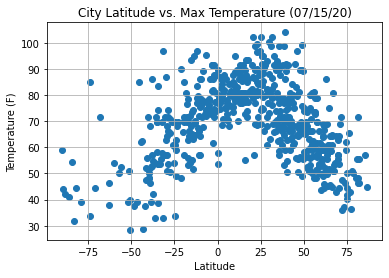

In [147]:
# Build a scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({analysis_date})")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsMaxTemp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

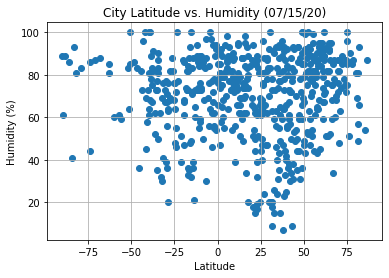

In [148]:
# Build a scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({analysis_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsHumidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

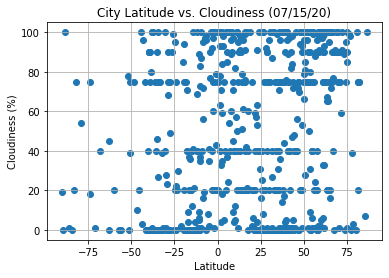

In [149]:
# Build a scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({analysis_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsCloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

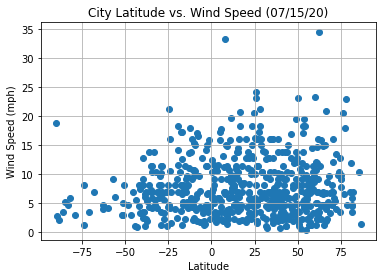

In [150]:
# Build a scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({analysis_date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsWindSpeed.png")

# Show plot
plt.show()

## Linear Regression

In [340]:
# OPTIONAL: Create a function to create Linear Regression plots

def lin_reg_plot(x_list, y_list, x_label, y_label, plot_title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_list, y_list)
    #print(x_list, y_list,slope, intercept, rvalue, pvalue, stderr)
    regress_values = x_list * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_list,y_list)
    plt.plot(x_list,regress_values,"r-")
    annotate_position_x = min(x_list) + 0.25*(max(x_list) - min(x_list))
    annotate_position_y = min(y_list) + 0.10*(max(y_list) - min(y_list))
    
    bbox_props = dict(boxstyle="round", fc="w", ec="0.9", alpha=0.9, lw=1)
    t = plt.text(annotate_position_x, annotate_position_y, line_eq, ha="center", va="center", size=15,
        bbox=bbox_props)
    #t.set_bbox(dict(facecolor='red', alpha=0.1, edgecolor='red'))
    #plt.annotate(line_eq,(annotate_position_x,annotate_position_y),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()


In [341]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_data = clean_city_data.loc[weather_data['Lat'] > 0]
northern_hemisphere_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olafsvik,63.28,63.28,49.64,92.0,100.0,15.95,IS,1.594844e+09
1,ribeira grande,41.53,41.53,71.60,73.0,75.0,11.41,PT,1.594844e+09
2,rivers,50.06,50.06,75.20,47.0,75.0,23.04,CA,1.594844e+09
4,great yarmouth,55.55,55.55,60.01,99.0,100.0,8.16,GB,1.594844e+09
6,muli,2.50,2.50,84.15,75.0,100.0,11.10,MV,1.594844e+09
...,...,...,...,...,...,...,...,...,...
616,medicine hat,50.40,50.40,73.99,49.0,75.0,8.05,CA,1.594844e+09
617,santa isabel,28.50,28.50,60.80,87.0,90.0,5.82,BR,1.594845e+09
618,zhangjiakou,41.55,41.55,69.26,67.0,0.0,3.67,CN,1.594845e+09
619,qostanay,53.71,53.71,75.20,47.0,0.0,4.47,KZ,1.594845e+09


In [342]:
# Create Northern and Southern Hemisphere DataFrames
southern_hemisphere_data = clean_city_data.loc[weather_data['Lat'] < 0]
southern_hemisphere_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,vaini,-67.95,-67.95,71.60,88.0,40.0,6.93,TO,1.594844e+09
5,mount gambier,-42.13,-42.13,37.40,100.0,75.0,8.05,AU,1.594844e+09
7,arraial do cabo,-39.33,-39.33,68.00,68.0,75.0,3.36,BR,1.594844e+09
10,hobart,-82.03,-82.03,44.60,81.0,75.0,5.82,AU,1.594844e+09
13,busselton,-90.00,-90.00,59.00,89.0,19.0,18.84,AU,1.594844e+09
...,...,...,...,...,...,...,...,...,...
611,caluquembe,-14.34,-14.34,51.75,39.0,0.0,5.10,AO,1.594845e+09
612,conceicao da barra,-19.26,-19.26,71.76,86.0,94.0,11.50,BR,1.594845e+09
615,vaitape,-16.87,-16.87,78.53,84.0,9.0,17.29,PF,1.594845e+09
620,vallenar,-28.51,-28.51,74.44,20.0,0.0,6.49,CL,1.594845e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4238355836748854


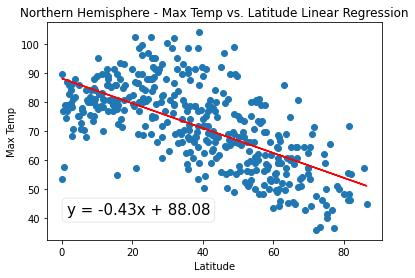

In [343]:
x_list = northern_hemisphere_data['Lat']
y_list = northern_hemisphere_data['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp'
plot_title = 'Northern Hemisphere - Max Temp vs. Latitude Linear Regression'

lin_reg_plot(x_list, y_list, x_label, y_label, plot_title)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3809874704586287


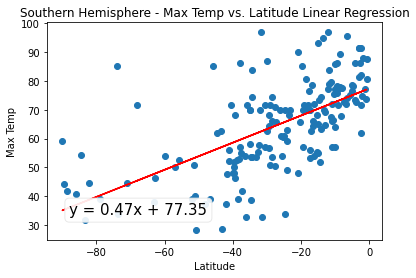

In [344]:
x_list = southern_hemisphere_data['Lat']
y_list = southern_hemisphere_data['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp'
plot_title = 'Southern Hemisphere - Max Temp vs. Latitude Linear Regression'

lin_reg_plot(x_list, y_list, x_label, y_label, plot_title)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006597790276914955


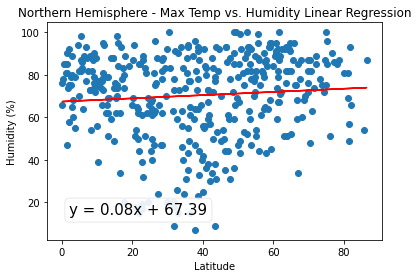

In [345]:
x_list = northern_hemisphere_data['Lat']
y_list = northern_hemisphere_data['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'
plot_title = 'Northern Hemisphere - Max Temp vs. Humidity Linear Regression'

lin_reg_plot(x_list, y_list, x_label, y_label, plot_title)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.003770584080716919


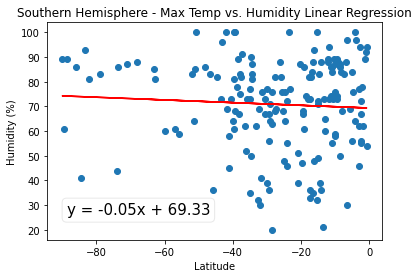

In [346]:
x_list = southern_hemisphere_data['Lat']
y_list = southern_hemisphere_data['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'
plot_title = 'Southern Hemisphere - Max Temp vs. Humidity Linear Regression'

lin_reg_plot(x_list, y_list, x_label, y_label, plot_title)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007071017645794525


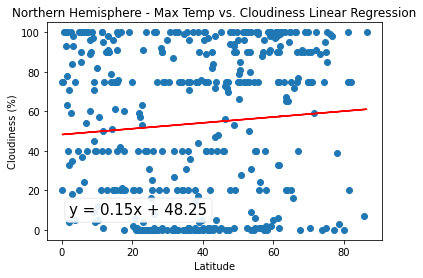

In [347]:
x_list = northern_hemisphere_data['Lat']
y_list = northern_hemisphere_data['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
plot_title = 'Northern Hemisphere - Max Temp vs. Cloudiness Linear Regression'

lin_reg_plot(x_list, y_list, x_label, y_label, plot_title)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.008346925793235517


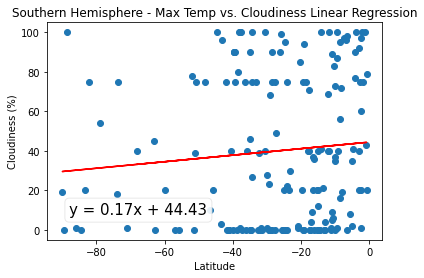

In [348]:
x_list = southern_hemisphere_data['Lat']
y_list = southern_hemisphere_data['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
plot_title = 'Southern Hemisphere - Max Temp vs. Cloudiness Linear Regression'

lin_reg_plot(x_list, y_list, x_label, y_label, plot_title)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00043118078957189417


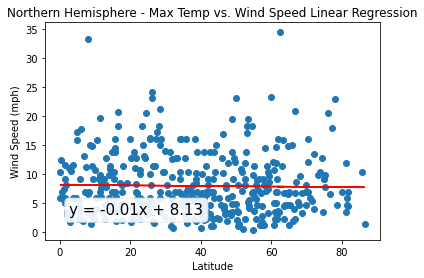

In [349]:
x_list = northern_hemisphere_data['Lat']
y_list = northern_hemisphere_data['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (mph)'
plot_title = 'Northern Hemisphere - Max Temp vs. Wind Speed Linear Regression'

lin_reg_plot(x_list, y_list, x_label, y_label, plot_title)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03397420197524996


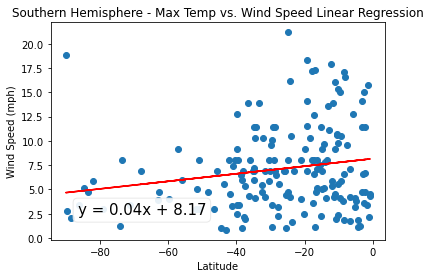

In [350]:
x_list = southern_hemisphere_data['Lat']
y_list = southern_hemisphere_data['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (mph)'
plot_title = 'Southern Hemisphere - Max Temp vs. Wind Speed Linear Regression'

lin_reg_plot(x_list, y_list, x_label, y_label, plot_title)